# **Yolo**

Visão Computacional   
Prof Adson Nogueira Alves.   
FACENS.  

In [ ]:
! pip install ultralytics -q

## A Arquitetura YOLO (You Only Look Once)

O YOLO é um dos modelos de detecção de objetos mais populares e influentes. Sua principal inovação foi abordar a detecção como um problema de regressão única, em vez de um pipeline multi-etapas. Isso o tornou significativamente mais rápido que os métodos anteriores.

### Base Histórica: Antes do YOLO

Antes do YOLO, a detecção de objetos geralmente envolvia múltiplos passos:

1.  **Seleção de Regiões:** Algoritmos como Selective Search ou Edge Boxes propunham milhares de regiões possíveis na imagem onde um objeto poderia estar.
2.  **Extração de Características:** Para cada região proposta, características eram extraídas (ex: HOG, SIFT).
3.  **Classificação:** Um classificador (ex: SVM) era usado para determinar a classe do objeto em cada região.
4.  **Pós-processamento:** Técnicas como Non-Maximum Suppression (NMS) eram aplicadas para remover caixas sobrepostas e refinar os resultados.

Métodos como R-CNN, Fast R-CNN e Faster R-CNN melhoraram a velocidade e precisão, mas ainda mantinham essa estrutura de pipeline com etapas separadas.


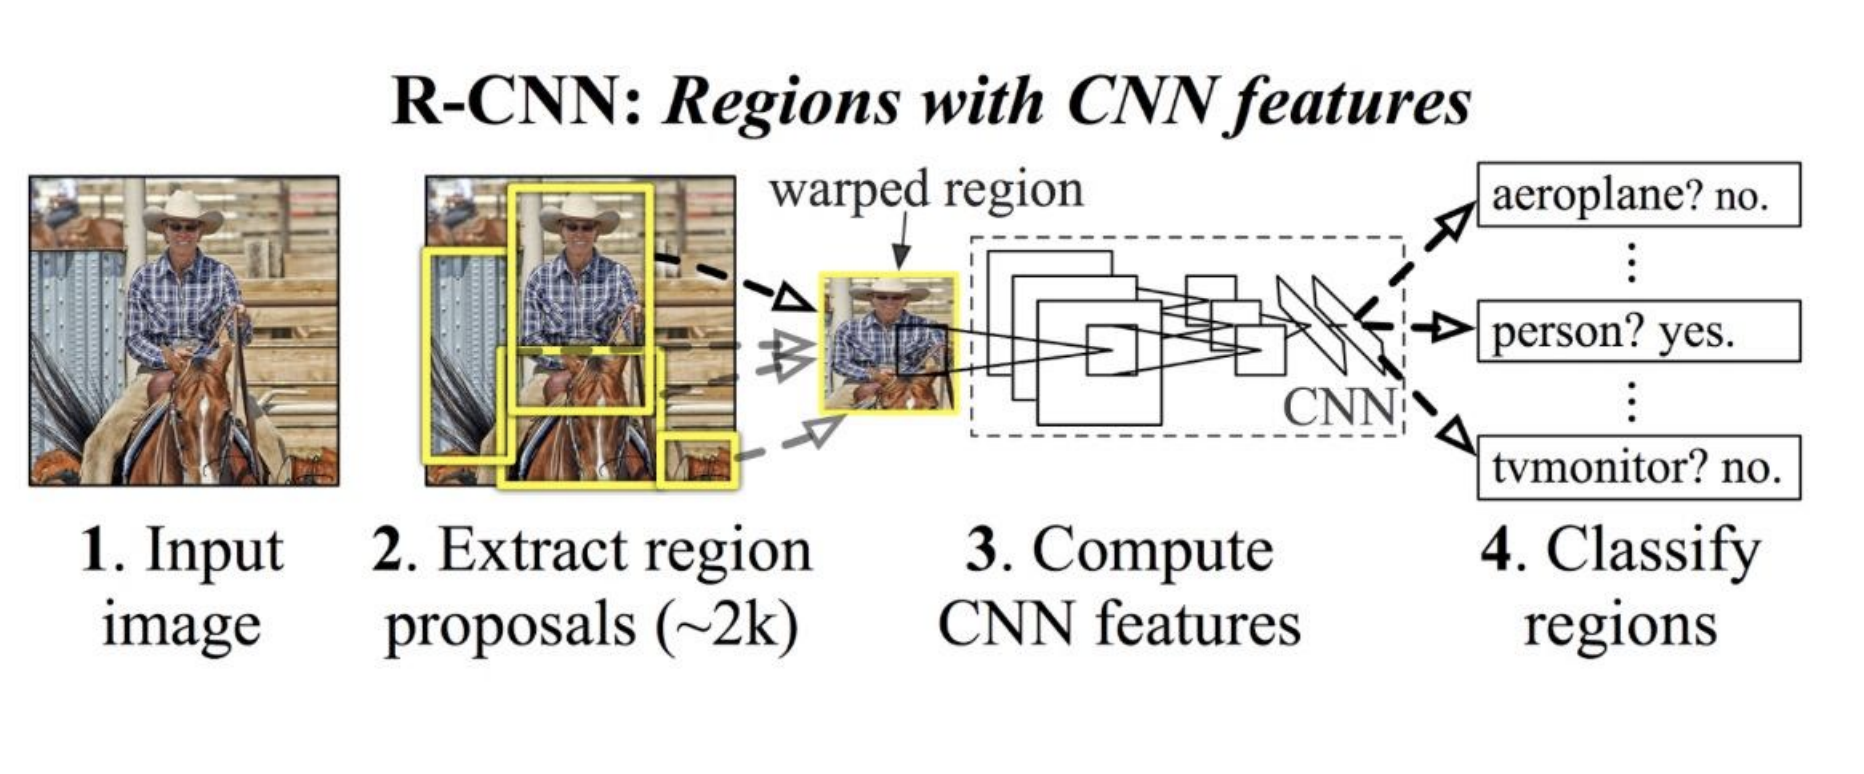



### A Revolução do YOLO (YOLOv1)

Em 2016, Redmon et al. apresentaram o YOLO, propondo uma abordagem unificada:

-   A imagem inteira é passada por uma única rede neural convolucional.
-   A rede divide a imagem em uma grade (grid) SxS.
-   Para cada célula da grade, a rede prevê:
    -   B caixas delimitadoras (bounding boxes).
    -   Um score de confiança para cada caixa (indicando a probabilidade de conter um objeto e a precisão da caixa).
    -   Probabilidades de classe condicionais (probabilidade de ser uma classe X, dado que há um objeto).

A grande sacada é que a rede prevê as caixas e as classes **diretamente** a partir das características globais da imagem em uma única avaliação. **"You Only Look Once"** (Você só olha uma vez) - daí o nome!

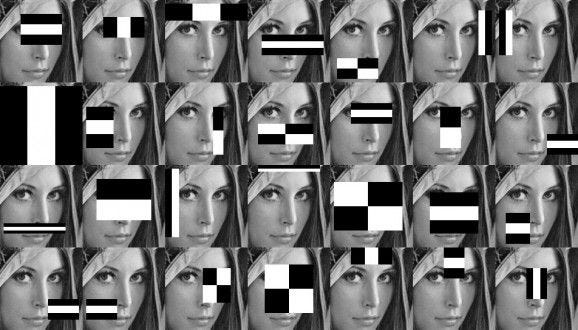

haarcascades


**Arquitetura Básica do YOLOv1:**

-   Uma rede convolucional inspirada no GoogLeNet.
-   24 camadas convolucionais seguidas por 2 camadas totalmente conectadas.
-   Saída final em um tensor SxSx(B*5 + C), onde:
    -   S: tamanho da grade (ex: 7x7).
    -   B: número de caixas por célula (ex: 2).
    -   5: (x, y, w, h, confidence).
    -   C: número de classes.   
    
**veja**

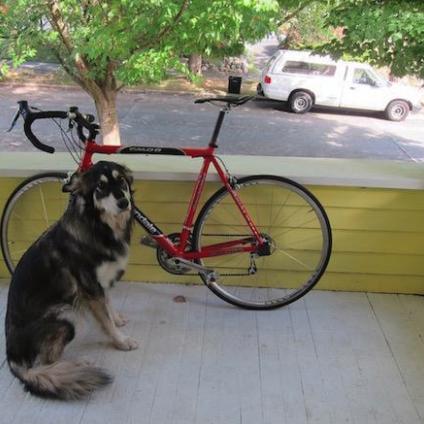

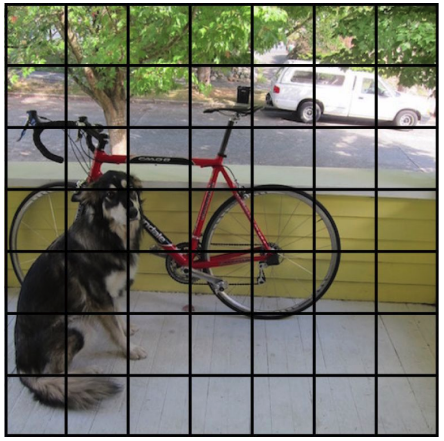

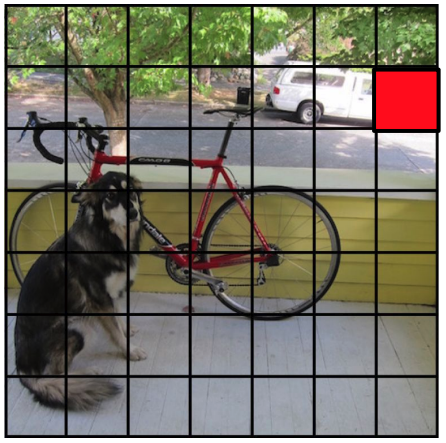

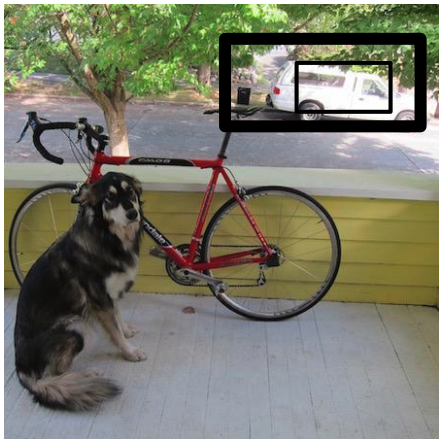

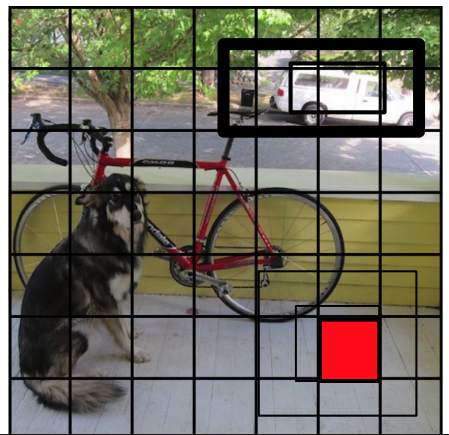

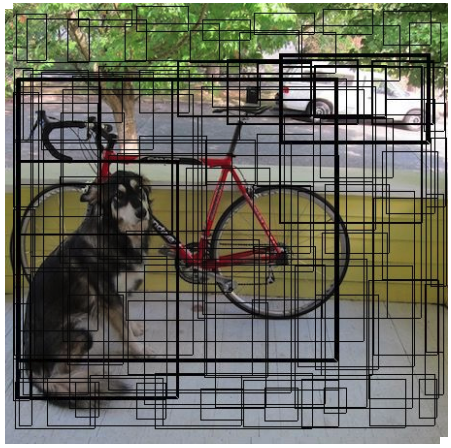

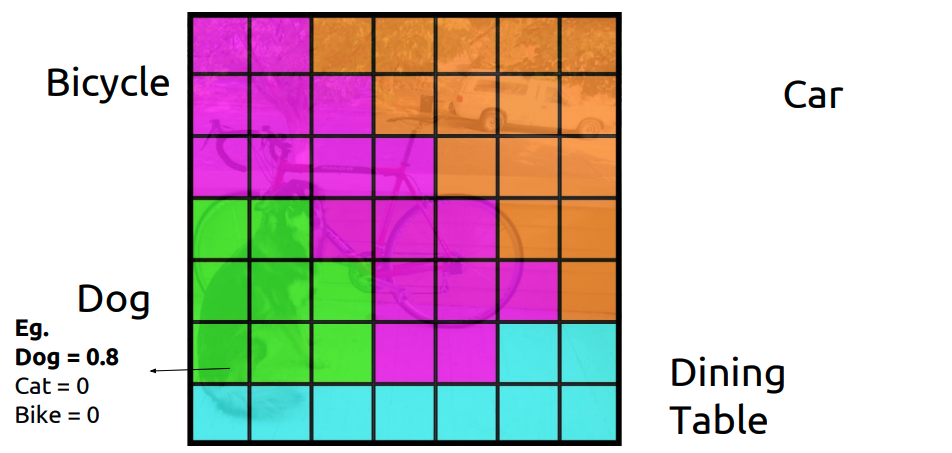

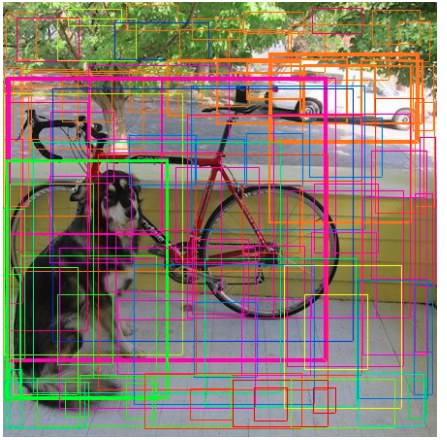

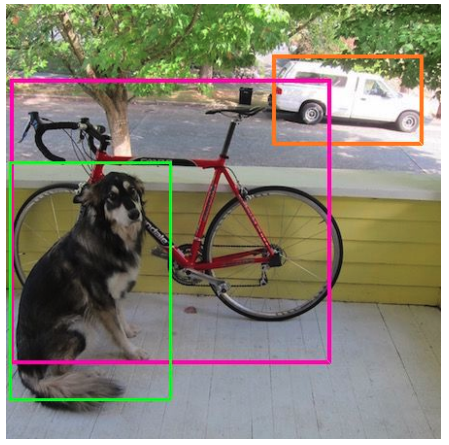

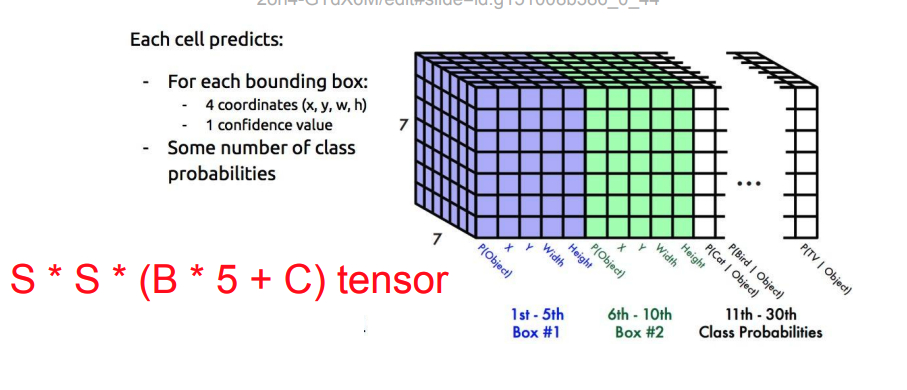

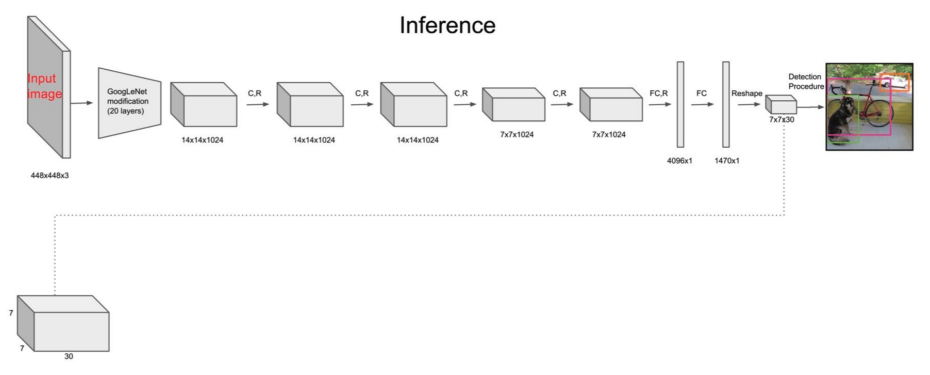

- **Imagem (448×448×3)**  
  ↓  
- **GoogLeNet (20 camadas)**  
  ↓  
- **Feature maps (14×14×1024)**  
  ↓  
- **Redução (7×7×1024)**  
  ↓  
- **Camadas FC → vetor 4096 → vetor 1470**  
  ↓  
- **Reshape (7×7×30)**  
  ↓  
- **Detecção (NMS + scores)**


### Evolução do YOLO (YOLOv2, YOLOv3, etc.)

As versões subsequentes do YOLO introduziram melhorias significativas:

-   **YOLOv2 (YOLO9000):** Batch Normalization, âncoras (anchor boxes) para prever caixas de diferentes tamanhos e proporções, e um backbone mais eficiente (Darknet-19).
-   **YOLOv3:** Backbone Darknet-53, previsões em múltiplas escalas (para detectar objetos pequenos, médios e grandes), e a substituição do softmax por classificadores logísticos binários independentes para cada classe.
-   **YOLOv4, YOLOv5, YOLOv6, YOLOv7, YOLOv8:** Diversas otimizações no backbone, neck (camadas entre backbone e head), head (camadas de saída), funções de perda e técnicas de treinamento para melhorar precisão e velocidade

**Links para os Artigos Originais do YOLO:**    

- **YOLOv1:** [You Only Look Once: Unified, Real-Time Object Detection](https://arxiv.org/abs/1506.02640)
- **YOLOv2:** [YOLO9000: Better, Faster, Stronger](https://arxiv.org/abs/1612.08242)
- **YOLOv3:** [YOLOv3: An Incremental Improvement](https://arxiv.org/abs/1804.02767)
- **YOLOv4:** [YOLOv4: Optimal Speed and Accuracy of Object Detection](https://arxiv.org/abs/2004.10934)
- **YOLOv6:** [YOLOv6: A Single-Stage Object Detection Framework for Industrial Applications](https://arxiv.org/abs/2209.02976)
- **YOLOv7:** [YOLOv7: Trainable bag-of-freebies for real-time object detection](https://arxiv.org/abs/2207.02696)
- **YOLOvn:** Não possui um artigo científico formal. A documentação oficial é a principal referência.

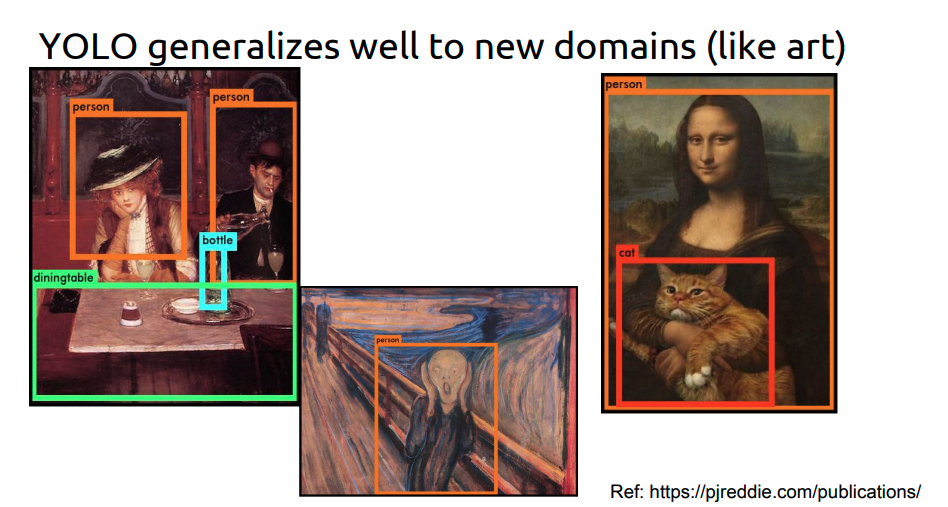

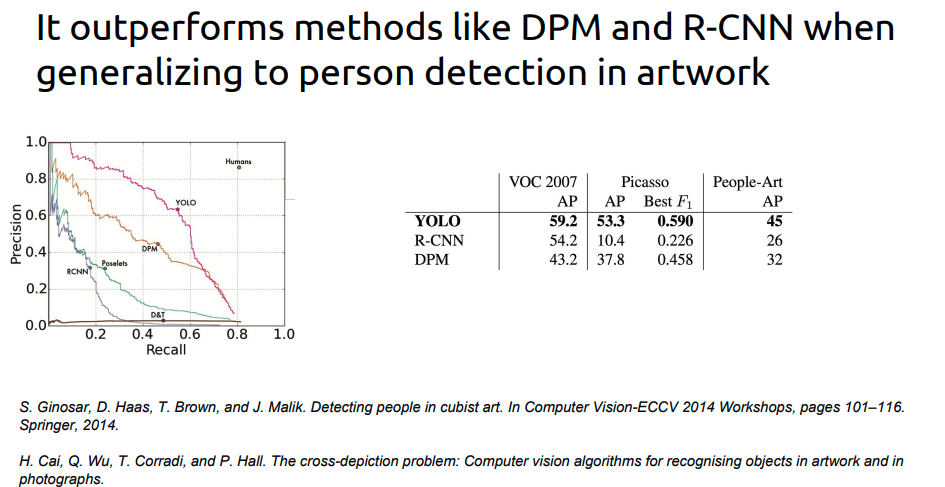


### YOLO e Ultralytics

A Ultralytics popularizou e otimizou as implementações do YOLO, tornando-o mais acessível e eficiente. A biblioteca `ultralytics` que usamos no exemplo anterior encapsula toda a complexidade da arquitetura e do treinamento/inferência do YOLO.

Ao usar `YOLO("yolov11n.pt")`, você está carregando um modelo YOLOv11 pré-treinado com uma arquitetura específica (a versão "nano", que é leve e rápida). A biblioteca cuida de:

1.  Carregar a estrutura da rede (backbone, neck, head).
2.  Carregar os pesos treinados.
3.  Processar a imagem de entrada (redimensionamento, normalização).
4.  Executar a inferência na rede.
5.  Processar a saída (decodificar as previsões da grade para caixas, scores e classes).
6.  Aplicar Non-Maximum Suppression (NMS) para obter as detecções finais.



A arquitetura exata do YOLOv11 (usado pela Ultralytics) é complexa e modular, mas segue a estrutura geral de Backbone -> Neck -> Head, com diversas camadas convolucionais, de atenção (como C2f- Cross Stage Partial with fusion e SPPF - Spatial Pyramid Pooling Fast) e de upsampling/downsampling para processar características em diferentes escalas.

Em resumo, o YOLO mudou o jogo na detecção de objetos ao unificar o processo em uma única rede neural, e a Ultralytics tornou essa tecnologia poderosa mais fácil de usar e implementar.

https://docs.ultralytics.com/pt/tasks/detect/

## Getting Started com Ultralytics YOLOv11

A biblioteca `ultralytics` torna o uso dos modelos YOLO (You Only Look Once) muito mais acessível. Ela oferece uma API simples para treinar, validar e usar modelos YOLOvn para diversas tarefas, incluindo detecção de objetos, segmentação e classificação.

In [ ]:
import urllib.request

# Baixar imagem de exemplo
urllib.request.urlretrieve(
    "https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEiyIqmhhyphenhyphenszp9l7q-3bFrNffKdzwflxzxd2v5uZevbRqazTehrGjfsxzvbCuNASSaJacCBYIORiiAF0pOuN-efa0zuj9oT2nMo4Rgu-j00xirYwhX0u0VdGPY2froWfeCvWAEJFhnCMVUO1/s640/Nehru+Place.png",
    "exemplo.png"
)

In [ ]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt

model = YOLO("yolo11n.pt")

img_path = "exemplo.png"
img = cv2.imread(img_path)

# Realizar a inferência
results = model(img) # results é uma lista de objetos Results

# Anotar a imagem com as detecções
# results[0].plot() já desenha as caixas, rótulos e confianças
annotated_img = results[0].plot()

annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(annotated_img_rgb)
plt.axis("off") # Desativar eixos
plt.show()

In [ ]:
print(model.names)

In [ ]:
import json

res = results[0]
detections_json = res.to_json()

# Converter string JSON em dicionário Python
detections = json.loads(detections_json)

total = len(detections)

# Contagem por classe
counts = {}
for det in detections:
    cls_name = det['name']
    counts[cls_name] = counts.get(cls_name, 0) + 1

# Mostrar resultados
print("Total de objetos detectados:", total)
print("Contagem por classe:")
for k, v in counts.items():
    print(f"  - {k}: {v}")


In [ ]:
detections

# Aula Prática
- Detecção Yolo


In [ ]:
! pip install ultralytics -q

## Aula Prática: Detecção de Objetos com Ultralytics YOLOv11

Esta aula prática guiará você através do processo de detecção de objetos usando a biblioteca Ultralytics e um modelo YOLOv11 pré-treinado. Vamos cobrir a pipeline completa, desde a preparação dos dados até a avaliação dos resultados.

**Pré-requisitos:**

- Ter a biblioteca `ultralytics` instalada (`!pip install ultralytics -q`)
- Compreensão básica de detecção de objetos e da arquitetura YOLO.

---

### Passo 1: Preparação dos Dados

Para treinar ou validar um modelo de detecção de objetos, você precisa de um dataset com imagens e anotações (bounding boxes e classes).

**Estrutura de Diretórios:**

É comum organizar os dados da seguinte forma:

In [ ]:
# data.yaml
path: ../datasets/meu_dataset  # Caminho para o diretório raiz do seu dataset
train: images/train           # Caminho para as imagens de treino relativo ao 'path'
val: images/val               # Caminho para as imagens de validação relativo ao 'path'
test: images/test             # Caminho para as imagens de teste relativo ao 'path' (opcional)

nc: 80  # Número de classes (ex: 80 para COCO)
names: ['person', 'bicycle', 'car', ...]  # Lista dos nomes das classes na ordem correta

In [ ]:
# Model
model: yolo11n.pt  # Modelo pré-treinado a ser carregado (ou 'yolo11n.yaml' para treinar do zero)

# Dataset
data: data.yaml  # Caminho para o arquivo data.yaml

#args.yaml
# Training
epochs: 5     # Número de épocas
batch: 16        # Tamanho do batch
imgsz: 640       # Tamanho da imagem (width, height)
workers: 8       # Número de workers para carregamento de dados
device: 0        # Dispositivo para treinamento (ex: 0 para GPU, 'cpu' para CPU)
patience: 50     # Número de épocas sem melhora para early stopping
single_cls: false # classe unica

# Optimization
optimizer: auto # Optimizer (auto, SGD, Adam, Adamax, NAdam, RAdam, RMSProp)
lr0: 0.01       # Initial learning rate
lrf: 0.01       # Final learning rate (lr0 * lrf)
momentum: 0.937 # SGD momentum/Adam beta1
weight_decay: 0.0005 # Optimizer weight decay
dropout: 0.05  # (Ajudar na generalização)

# Augmentation
augment: true   # (baixa quantidade de dados)
hsv_h: 0.015   # HSV hue augmentation (fraction)
hsv_s: 0.7     # HSV saturation augmentation (fraction)
hsv_v: 0.4     # HSV value augmentation (fraction)
degrees: 0.0   # Image rotation (degrees)
translate: 0.1 # Image translation (fraction)
scale: 0.5     # Image scale (linear)
shear: 0.0     # Image shear (degrees)
perspective: 0.0 # Image perspective (applied to all four corners)
flipud: 0.0    # Flip image upside down (probability)
fliplr: 0.5    # Flip image left-right (probability)
mosaic: 1.0    # Mosaic augmentation (probability)
mixup: 0.0     # Mixup augmentation (probability)
copy_paste: 0.0 # Copy-paste augmentation (probability)
erasing: 0.4 # (dataset pequeno)
crop_fraction: 0.8 # (Onde o objeto aparece parcialmente.)

# Other
project: runs/train # Diretório onde os resultados serão salvos
name: custom_yolov11 # Nome da execução
exist_ok: False     # Permitir sobrescrever execução existente

In [ ]:
!cp /usr/local/lib/python3.*/dist-packages/ultralytics/cfg/default.yaml ./args.yaml
from google.colab import files
files.download('args.yaml')

In [ ]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
! kaggle datasets download yusufberksardoan/traffic-detection-project -q

In [ ]:
! unzip traffic-detection-project.zip

In [ ]:
from ultralytics import YOLO

# Carregar o modelo (pode ser um modelo pré-treinado ou um arquivo .yaml para treinar do zero)
model = YOLO('yolo11n.pt') # Usando o modelo nano pré-treinado

# Iniciar o treinamento usando o arquivo data.yaml e args.yaml
results = model.train(data='data.yaml', cfg='args.yaml')

In [ ]:
# 🔍 MONITORAMENTO DO TREINAMENTO EM TEMPO REAL
# Execute esta célula para verificar o progresso do treinamento

import os
import pandas as pd
import time
from datetime import datetime
import glob

def monitorar_treinamento():
    """
    Monitora o progresso do treinamento YOLO verificando:
    - Arquivos de resultados mais recentes
    - Último epoch completado
    - Métricas atuais
    - Se o processo ainda está rodando (verificando atualizações do arquivo)
    """
    
    # Procurar por diretórios de treinamento
    train_dirs = glob.glob('runs/detect/train*') + glob.glob('runs/train/*')
    train_dirs = [d for d in train_dirs if os.path.isdir(d)]
    
    if not train_dirs:
        print("❌ Nenhum diretório de treinamento encontrado em runs/")
        return
    
    # Ordenar por data de modificação (mais recente primeiro)
    train_dirs.sort(key=lambda x: os.path.getmtime(x), reverse=True)
    
    print("=" * 70)
    print("🔍 MONITORAMENTO DO TREINAMENTO YOLO")
    print("=" * 70)
    print(f"\n📁 Diretórios de treinamento encontrados: {len(train_dirs)}")
    
    for train_dir in train_dirs[:3]:  # Mostrar os 3 mais recentes
        print(f"\n{'='*70}")
        print(f"📂 Diretório: {train_dir}")
        print(f"{'='*70}")
        
        # Verificar arquivo results.csv
        results_file = os.path.join(train_dir, 'results.csv')
        
        if os.path.exists(results_file):
            # Obter informações do arquivo
            mod_time = os.path.getmtime(results_file)
            mod_time_str = datetime.fromtimestamp(mod_time).strftime('%Y-%m-%d %H:%M:%S')
            time_since_mod = time.time() - mod_time
            
            print(f"\n📊 Arquivo results.csv encontrado!")
            print(f"   Última modificação: {mod_time_str}")
            
            if time_since_mod < 300:  # Menos de 5 minutos
                print(f"   ⚡ Status: PROVAVELMENTE RODANDO (atualizado há {int(time_since_mod)} segundos)")
            elif time_since_mod < 600:  # Menos de 10 minutos
                print(f"   ⚠️  Status: Pode estar rodando (atualizado há {int(time_since_mod/60)} minutos)")
            else:
                print(f"   ⏸️  Status: Pode ter finalizado (atualizado há {int(time_since_mod/60)} minutos)")
            
            # Ler e mostrar progresso
            try:
                df = pd.read_csv(results_file)
                if len(df) > 0:
                    last_epoch = df.iloc[-1]
                    total_epochs = len(df)
                    
                    print(f"\n📈 Progresso:")
                    print(f"   Epoch atual: {total_epochs}")
                    print(f"   Tempo total: {last_epoch['time']:.2f} segundos ({last_epoch['time']/3600:.2f} horas)")
                    
                    print(f"\n🎯 Métricas mais recentes:")
                    print(f"   Precision: {last_epoch['metrics/precision(B)']:.4f}")
                    print(f"   Recall: {last_epoch['metrics/recall(B)']:.4f}")
                    print(f"   mAP50: {last_epoch['metrics/mAP50(B)']:.4f}")
                    print(f"   mAP50-95: {last_epoch['metrics/mAP50-95(B)']:.4f}")
                    
                    print(f"\n📉 Losses (último epoch):")
                    print(f"   Train Box Loss: {last_epoch['train/box_loss']:.4f}")
                    print(f"   Train Cls Loss: {last_epoch['train/cls_loss']:.4f}")
                    print(f"   Val Box Loss: {last_epoch['val/box_loss']:.4f}")
                    print(f"   Val Cls Loss: {last_epoch['val/cls_loss']:.4f}")
                    
                    # Verificar se há melhorias
                    if len(df) > 1:
                        prev_epoch = df.iloc[-2]
                        map_improvement = last_epoch['metrics/mAP50(B)'] - prev_epoch['metrics/mAP50(B)']
                        if map_improvement > 0:
                            print(f"\n✅ Melhoria no mAP50: +{map_improvement:.4f}")
                        else:
                            print(f"\n📊 Variação no mAP50: {map_improvement:.4f}")
                    
            except Exception as e:
                print(f"   ⚠️  Erro ao ler results.csv: {e}")
        else:
            print(f"\n⚠️  Arquivo results.csv não encontrado")
        
        # Verificar se há arquivos de pesos
        weights_dir = os.path.join(train_dir, 'weights')
        if os.path.exists(weights_dir):
            best_pt = os.path.join(weights_dir, 'best.pt')
            last_pt = os.path.join(weights_dir, 'last.pt')
            
            if os.path.exists(best_pt):
                best_time = datetime.fromtimestamp(os.path.getmtime(best_pt)).strftime('%Y-%m-%d %H:%M:%S')
                best_size = os.path.getsize(best_pt) / (1024*1024)  # MB
                print(f"\n💾 Melhor modelo (best.pt):")
                print(f"   Tamanho: {best_size:.2f} MB")
                print(f"   Última atualização: {best_time}")
            
            if os.path.exists(last_pt):
                last_time = datetime.fromtimestamp(os.path.getmtime(last_pt)).strftime('%Y-%m-%d %H:%M:%S')
                last_size = os.path.getsize(last_pt) / (1024*1024)  # MB
                print(f"\n💾 Último checkpoint (last.pt):")
                print(f"   Tamanho: {last_size:.2f} MB")
                print(f"   Última atualização: {last_time}")
    
    print(f"\n{'='*70}")
    print("💡 Dica: Execute esta célula novamente para atualizar o status")
    print("💡 Se o arquivo foi atualizado recentemente (< 5 min), o treinamento provavelmente está rodando")
    print(f"{'='*70}\n")

# Executar monitoramento
monitorar_treinamento()


In [ ]:
# Carregar o modelo treinado
model = YOLO('runs/train/custom_yolov112/weights/best.pt')

In [ ]:
# Validar o modelo no conjunto de validação
metrics = model.val(data='data.yaml')

In [ ]:
# Validar o modelo no conjunto de test
metrics = model.val(data='data.yaml', split='test')

In [ ]:
metrics.to_json()

In [ ]:
metrics.to_df()

In [ ]:
# Ver tudo
print(metrics.results_dict)

In [ ]:
model.names

In [ ]:
print(metrics.box.p)
print(metrics.box.r)


In [ ]:
print(metrics.box.ap)

In [ ]:
from ultralytics import YOLO
import os

# Caminho do modelo e das imagens
model = YOLO('runs/train/custom_yolov112/weights/best.pt')
source_dir = '/content/imgtest'

# Rodar predições e salvar resultados na mesma pasta
results = model.predict(
    source=source_dir,
    save=True,
    project=source_dir,  # usa a mesma pasta como base
    name='',             # evita criar subpastas (opcional)
    exist_ok=True        # sobrescreve se já existir
)


In [ ]:
# Lista para consolidar todos os resultados
output_data = []

# Iterar sobre os resultados
for result in results:
    image_info = {
        "image_path": result.path,
        "image_shape": result.orig_shape,  # (h, w)
        "boxes": [],
        "masks": None,
        "keypoints": None,
        "probs": None,
        "obb": None
    }

    # --- Bounding boxes ---
    if result.boxes is not None:
        for box in result.boxes:
            box_data = {
                "xyxy": box.xyxy.tolist()[0],  # coordenadas [x1, y1, x2, y2]
                "conf": float(box.conf[0]),    # confiança
                "cls": int(box.cls[0]),        # índice da classe
                "cls_name": result.names[int(box.cls[0])]  # nome da classe
            }
            image_info["boxes"].append(box_data)

    # --- Máscaras (segmentation) ---
    if result.masks is not None:
        image_info["masks"] = result.masks.xy  # listas de polígonos por máscara

    # --- Keypoints (pose estimation) ---
    if result.keypoints is not None:
        image_info["keypoints"] = result.keypoints.xy.tolist()

    # --- Probabilidades (classification) ---
    if result.probs is not None:
        probs_dict = {
            "top1_class": int(result.probs.top1),
            "top1_conf": float(result.probs.top1conf),
            "all_probs": result.probs.data.tolist()
        }
        image_info["probs"] = probs_dict

    # --- Oriented Bounding Boxes (OBB) ---
    if result.obb is not None:
        image_info["obb"] = result.obb.xyxyxyx.tolist()

    # Adiciona à lista final
    output_data.append(image_info)

# Caminho do JSON de saída
json_path = os.path.join(source_dir, "detections.json")

# Salvar em arquivo JSON
with open(json_path, "w") as f:
    json.dump(output_data, f, indent=4)

print(f"\n✅ JSON salvo em: {json_path}")

In [ ]:
from ultralytics import YOLO

model = YOLO('runs/train/custom_yolov112/weights/best.pt')

# Define path to the image file
source = "path/to/image.jpg"

# Run inference on the source
results = model(source)  # list of Results objects